# <center>Введение в ансамбли</center>

>**Ансамблевые модели** или просто **ансамбли (ensembles)** — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Необходимость использования ансамблей может возникнуть тогда, когда вы уже нашли хорошую модель и никак больше не можете повысить её качество. В этом случае можно перейти к более продвинутому методу: использовать не одну модель (пусть и очень хорошую), а ансамбли моделей.

Ансамбли — передовые алгоритмы для решения сложных задач машинного обучения. Сегодня они и нейронные сети являются главными конкурентами и дают наилучшие результаты, благодаря чему используются крупными компаниями в продакшене.

Существует три проверенных способа построения ансамблей:

* **Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
* **Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
* **Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.

>**Бэггинг (bagging)** — это алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

В основе алгоритма лежит статистический метод, который называется **бутстрэпом (bootstrap)**. Идея бутстрэпа заключается в генерации $k$ выборок размера $n$ (бутстрэп-выборок) из исходного набора данных размера $m$ путём случайного выбора элементов с повторениями в каждом из наблюдений. 

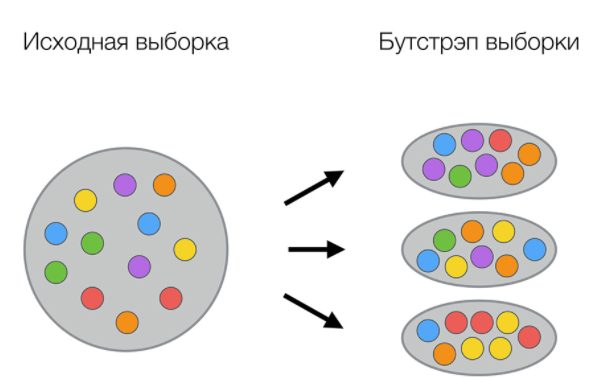

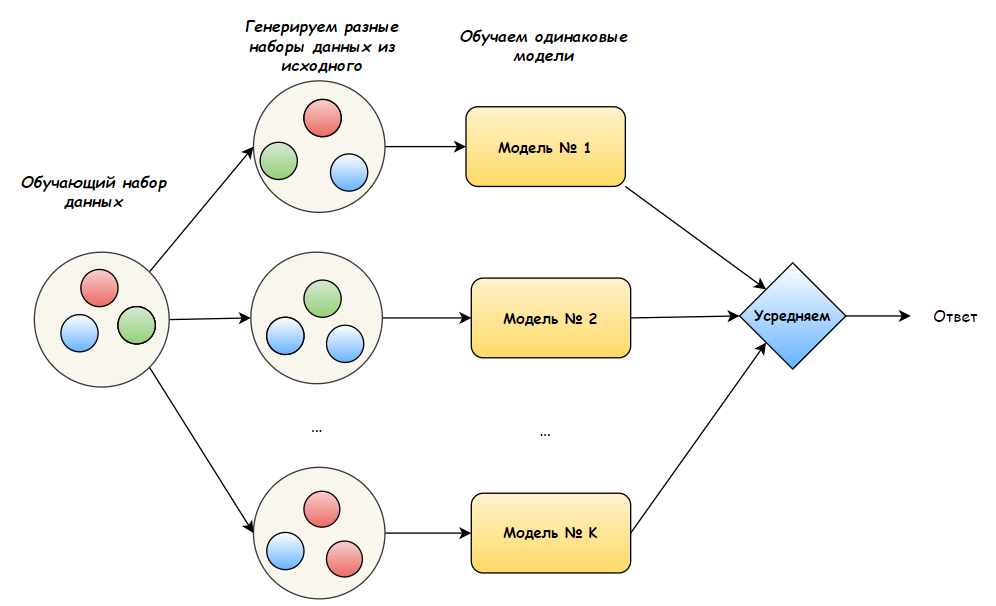

>В случае классификации «усреднение» означает мажоритарное голосование (принцип большинства голосов). То есть объект относится к тому классу, за который проголосовало большинство алгоритмов.

Важно отметить, что в бэггинге в голосовании принимает участие модель одного вида. Эта модель называется **базовой моделью (base model)**. Нельзя обучить на половине сгенерированных наборов данных логистические регрессии, а на второй половине — деревья решений.

* Смещение (bias) бэггинг-ансамбля не больше $(\leq)$ смещения одного алгоритма из этого ансамбля.
* Однако разброс (variance) бэггинг-ансамбля в $k$ раз меньше, чем разброс одного алгоритма из ансамбля, где $k$ — количество алгоритмов в ансамбле.

Теорема гарантирует, что средняя ошибка ансамбля, построенного по принципу бэггинга, не выше, чем средняя ошибка базовой модели, но при этом шанс переобучения алгоритма значительно ниже.

# <center>Случайный лес</center>

>**Случайный лес (Random Forest)** — это самая распространённая реализация бэггинга, основанная на использовании в качестве базовой модели дерева решений. 

Помимо бутстрэпа, случайный лес использует метод случайных подпространств. Суть этого метода заключается в том, что каждая модель обучается не на всех признаках, а только на части из них. Такой подход позволяет уменьшить коррелированность между ответами деревьев и сделать их независимыми друг от друга.

## Алгоритм построения случайного леса для классификации

Пусть количество объектов в наборе данных равно N, а количество признаков — M. То есть размер набора данных — (N, M). Количество деревьев в лесу равно K. Тогда для обучения случайного леса необходимо выполнить следующие шаги:

1. С помощью бутстрэпа создать K наборов данных размера (N, M).
2. Для каждого сгенерированного набора данных применить метод случайных подпространств: выбрать L < M случайных признаков и получить K новых наборов данных размером (N, L).
3. На каждом наборе данных обучить K деревьев решений.

Когда поступят новые данные, нам нужно будет прогнать их через каждое дерево и объединить результаты отдельных деревьев мажоритарным голосованием или путём комбинирования вероятностей.

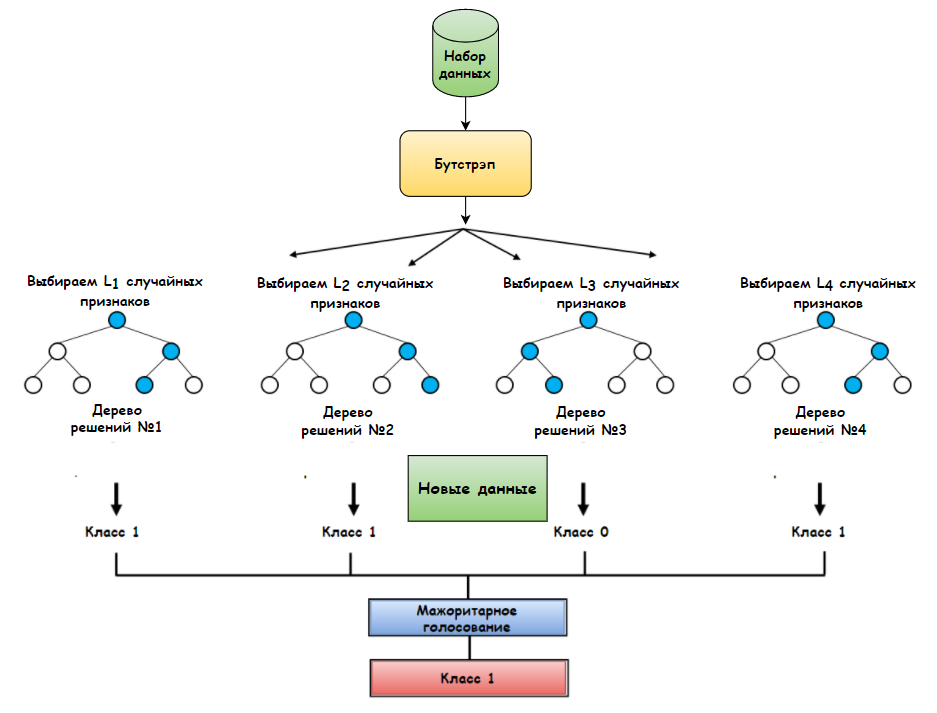

Пусть у нас есть набор данных со следующими факторами:

* $x_1$ — возраст,
* $x_2$ — доход в тысячах рублей,
* $x_3$ — группа крови.

Целевой признак ($y$) — подвергался ли человек операции хотя бы раз в жизни (1 — да, 0 — нет).

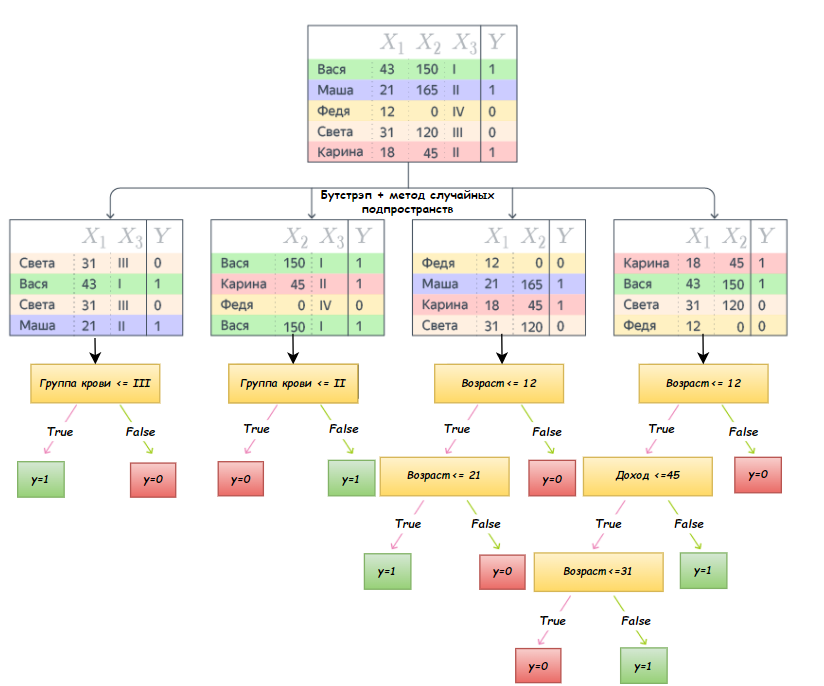

Деревья, из которых состоит лес, могут быть различной глубины и структуры в зависимости от того, насколько просто была разделима поданная выборка.

Теперь, когда поступят новые данные, нам останется только подать их на вход каждого из деревьев, получить предсказания, а затем усреднить их путём мажоритарного голосования и получить ответ:

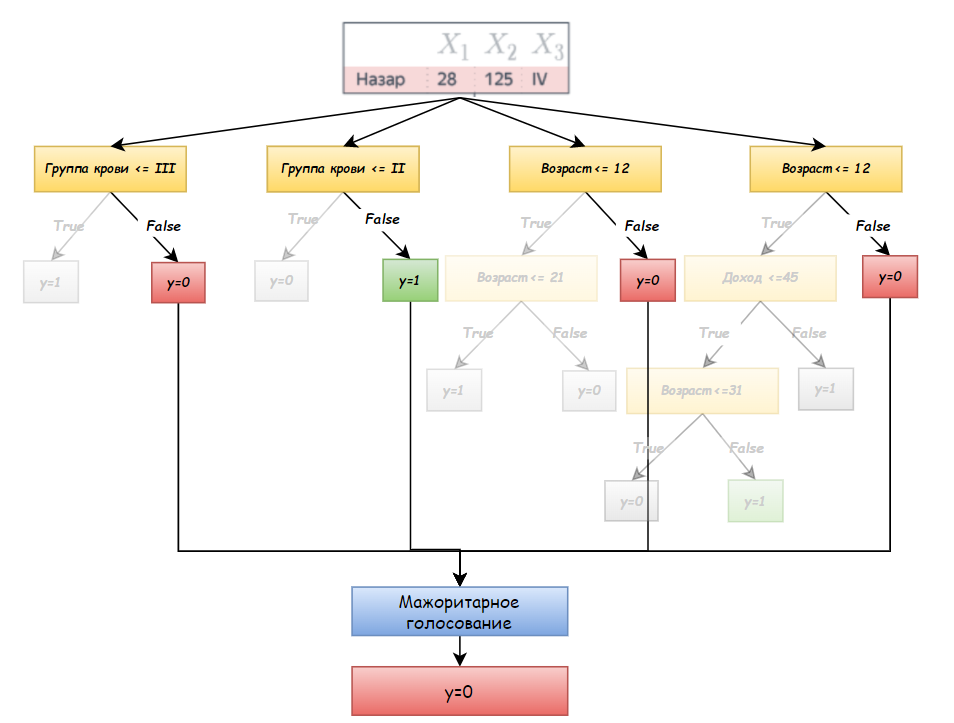